In [1]:
import requests
import os
import datetime as dt
from bs4 import BeautifulSoup
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt

In [2]:
user_agent= ""
session = requests.Session()
session.headers.update({'User-agent' : user_agent, 'referer' : None})

In [3]:
content_url = "https://news.naver.com"


In [4]:
# 뉴스 기사가 저장될 폴더이름 구성
datetime = dt.datetime.now().strftime("%y%m%d_%H%M%S")
dirname = "뉴스기사_%s" % datetime

# 뉴스기사를 텍스트 파일로 저장할 폴더 만들기
if not os.path.exists(dirname):
    os.mkdir(dirname)

In [5]:
r = session.get(content_url)

if r.status_code != 200:
    print("%d 에러가 발생했습니다." % r.status_code)
    quit()

In [6]:
# 인코딩 설정
r.encoding = "euc-kr"

# 웹 페이지의 소스코드를 사용하여 HTML 분석 객체 생성
soup = BeautifulSoup(r.text, 'html.parser')

# CSS 선택자를 활용하여 가져오기를 원하는 부분 지정
# -> 여러 개의 선택자를 사용해야 할 경우 콤마(,)로 구분
selector = soup.select('.hdline_flick_item > a, .hdline_article_tit > a, .mtype_img > dt > a, .mlist2 > li > a')

if not selector:   # 가져온 내용이 없다면?
    print("크롤링 실패")
    quit()

print(len(selector))
selector

45


[<a class="lnk_hdline_main_article nclicks('mai.image', '8800006B_000000000000000003004991', 'airsGParam', '0', 'news_qm_v2.0', 'NkwSXa2W5Sh7R0o1')" href="/main/read.nhn?mode=LSD&amp;mid=shm&amp;sid1=102&amp;oid=032&amp;aid=0003004991">
 <img alt="최강욱 “조국 아들 실제 인턴활동”…혐의 부인" height="190" onerror="javascript:this.src='https://ssl.pstatic.net/static.news/image/news/2009/noimage_300x190.png';" src="https://imgnews.pstatic.net/image/032/2020/04/21/0003004991_001_20200421220510190.jpg?type=nf300_190" width="300"/>
 <div class="hdline_flick_mask">
 <p class="hdline_flick_tit">최강욱 “조국 아들 실제 인턴활동”…혐의 부인</p>
 </div>
 </a>,
 <a class="lnk_hdline_cluster_more nclicks('mai.clu', '8800006B_000000000000000003004991', 'airsGParam', '0', 'news_qm_v2.0', 'NkwSXa2W5Sh7R0o1')" href="/main/clusterArticles.nhn?id=c_202004210510_00000058&amp;mode=LSD&amp;mid=shm&amp;oid=032&amp;aid=0003004991">
 <span class="blind">관련기사 개수</span>
 <span class="cluster_more_icon_num">85</span>
 </a>,
 <a class="lnk_hdline_mai

In [7]:
# 뉴스기사의 본문 URL을 저장할 리스트
url_list = []

# 리스트의 원소들에 대한 반복 처리
for item in selector:
    #print(type(item.attrs))
    #print(item.attrs)
    #print("-" * 30)
    
    # 각 원소(링크)에 속성들(attrs) 중에 href 속성이 있다면 그 값을 별도로 준비한 리스트에 추가
    if "href" in item.attrs:
        url_list.append(item['href'])
        
url_list

['/main/read.nhn?mode=LSD&mid=shm&sid1=102&oid=032&aid=0003004991',
 '/main/clusterArticles.nhn?id=c_202004210510_00000058&mode=LSD&mid=shm&oid=032&aid=0003004991',
 '/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=437&aid=0000236443',
 '/main/clusterArticles.nhn?id=c_202004210810_00000006&mode=LSD&mid=shm&oid=437&aid=0000236443',
 '/main/read.nhn?mode=LSD&mid=shm&sid1=101&oid=056&aid=0010823051',
 '/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=008&aid=0004398053',
 '/main/read.nhn?mode=LSD&mid=shm&sid1=102&oid=055&aid=0000809598',
 '/main/read.nhn?mode=LSD&mid=shm&sid1=104&oid=437&aid=0000236462',
 '/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=079&aid=0003352091',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=081&aid=0003084334',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=101&oid=011&aid=0003727756',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=102&oid=422&aid=0000425217',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1

In [8]:
for i, v in enumerate(url_list):
    if content_url not in v:
        url_list[i] = content_url + v
        
url_list

['https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=102&oid=032&aid=0003004991',
 'https://news.naver.com/main/clusterArticles.nhn?id=c_202004210510_00000058&mode=LSD&mid=shm&oid=032&aid=0003004991',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=437&aid=0000236443',
 'https://news.naver.com/main/clusterArticles.nhn?id=c_202004210810_00000006&mode=LSD&mid=shm&oid=437&aid=0000236443',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=101&oid=056&aid=0010823051',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=008&aid=0004398053',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=102&oid=055&aid=0000809598',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=104&oid=437&aid=0000236462',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=079&aid=0003352091',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=081&aid=0003084334',
 'https://news.naver.com/main/read.nhn?mod

In [9]:
# 워드클라우드를 위해 뉴스기사의 내용들을 누적해서 저장할 빈 문자열
content_merge = ""

# URL 목록만큼 반복
for i, url in enumerate(url_list):
    
    if "read.nhn" not in url:
        continue;
        
    print("%d번째 뉴스기사 수집중... >> %s" % (i+1, url))
    
    #-------------------------------------------------
    # 1) 뉴스 상세 페이지에 접속하여 HTML 소스코드 가져오기
    #-------------------------------------------------
    r = session.get(url)

    # 접속에 실패했다면 다음 항목으로 반복문의 제어를 이동
    if r.status_code != 200:
        print("%d 에러가 발생했습니다." % r.status_code)
        continue

    # 컨텐츠의 인코딩 형식 설정
    r.encoding = "euc-kr"
    
    #-------------------------------------------------
    # 2) 기사 영역 추출
    #-------------------------------------------------
    # HTML 코드 분석을 위한 객체 생성
    soup = BeautifulSoup(r.text, 'html.parser')
    
    # 추출할 영역 가져오기 -> 리스트 타입으로 리턴됨
    main_content = soup.select("#main_content")
    
    #-------------------------------------------------
    # 3) 기사 영역에서 제목 추출
    #-------------------------------------------------
    # 고유한 영역이므로 리스트의 0번째 항목에 직접 접근하여 제목영역 추출
    title = main_content[0].select("#articleTitle")
    
    # 제목의 0번째 항목에서 텍스트를 공백 제거하고 추출
    title_str = title[0].text.strip()
    
    # 기사 제목에서 파일이름으로 사용할 수 없는 특수문자 제거
    title_str = title_str.replace("'", "")
    title_str = title_str.replace('"', "")
    title_str = title_str.replace("?", "")
    title_str = title_str.replace("/", "")
    title_str = title_str.replace(">", "")
    title_str = title_str.replace("<", "")
    
    # 둥근따옴표 제거
    # "`ㄴ`>한자" 입력후 표시되는 팝업에서 선택 가능함
    title_str = title_str.replace("“", "")
    title_str = title_str.replace("”", "")
    title_str = title_str.replace("‘", "")
    title_str = title_str.replace("’", "")
    
    print(title_str)
    
    #-------------------------------------------------
    # 4) 기사 영역에서 내용 추출
    #-------------------------------------------------
    # 본문 가져오기
    article = main_content[0].select('#articleBodyContents')
    article_item = article[0]
    
    # 불필요한 태그 제거, 치환
    for target in article_item.find_all('script'): target.extract()
    for target in article_item.find_all('a'):      target.extract()
    for target in article_item.find_all('span'):   target.extract()
    for target in article_item.find_all('div'):    target.extract()
    for target in article_item.find_all('br'):     target.replace_with("\n")
    
    # 본문 텍스트 추출
    article_str = article_item.text.strip()
    
    # 현재 기사의 내용을 문자열 변수에 누적한다.
    content_merge += article_str
    
    #-------------------------------------------------
    # 5) 제목과 내용을 텍스트 파일로 저장
    #-------------------------------------------------
    # 제목과 내용이 모두 존재한다면?
    if title_str and article_str:
        # 기사 제목을 파일명으로 지정하여 내용을 텍스트로 저장한다.
        fname = dirname + "/" + title_str + ".txt"
        with open(fname, 'w', encoding='utf-8') as f:
            f.write(article_str)
            print(" >> 파일저장 성공: " + fname)

1번째 뉴스기사 수집중... >> https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=102&oid=032&aid=0003004991
최강욱 조국 아들 실제 인턴활동…혐의 부인
 >> 파일저장 성공: 뉴스기사_200421_225218/최강욱 조국 아들 실제 인턴활동…혐의 부인.txt
3번째 뉴스기사 수집중... >> https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=437&aid=0000236443
트럼프 방위비 한국 측 제안, 내가 거절…고강도 압박
 >> 파일저장 성공: 뉴스기사_200421_225218/트럼프 방위비 한국 측 제안, 내가 거절…고강도 압박.txt
5번째 뉴스기사 수집중... >> https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=101&oid=056&aid=0010823051
[앵커의 눈] 담합·탈세 꼼짝 마…집값 잡기 고삐
 >> 파일저장 성공: 뉴스기사_200421_225218/[앵커의 눈] 담합·탈세 꼼짝 마…집값 잡기 고삐.txt
6번째 뉴스기사 수집중... >> https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=008&aid=0004398053
태영호 김정은 신변이상설에 北 무반응은 이례적
 >> 파일저장 성공: 뉴스기사_200421_225218/태영호 김정은 신변이상설에 北 무반응은 이례적.txt
7번째 뉴스기사 수집중... >> https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=102&oid=055&aid=0000809598
미공개 정보 주식 거래 신라젠 또 압수수색…전방위 수사
 >> 파일저장 성공: 뉴스기사_200421_225218/미공개 정보 주식 거래 신라젠 또 압수수색…전방위 수사.txt
8번째 뉴스기사 수집중... >

네이버 인별 정산 방식, 음원 수익 편중현상 해소
 >> 파일저장 성공: 뉴스기사_200421_225218/네이버 인별 정산 방식, 음원 수익 편중현상 해소.txt


In [10]:
nlp =Okt()
nouns = nlp.nouns(content_merge)

In [11]:
for i, v in enumerate(nouns):
    if len(v) < 2:
        del nouns[i]
nouns

['재판',
 '검찰',
 '차별',
 '적',
 '기소',
 '의문',
 '윤석열',
 '시기',
 '고발',
 '정치',
 '검찰',
 '행태',
 '총선',
 '민주당',
 '비례대표',
 '당선',
 '최강',
 '전',
 '청와대',
 '공직',
 '강비',
 '서관',
 '조국',
 '법무부',
 '장관',
 '부부',
 '공모',
 '전',
 '장관',
 '아들',
 '인턴',
 '활동',
 '확인',
 '허위',
 '발급',
 '혐의',
 '부인',
 '서울중앙지법',
 '형사',
 '단독',
 '정종',
 '판사',
 '심리',
 '재판',
 '전',
 '비서',
 '변호인',
 '모든',
 '사실',
 '부인',
 '조',
 '전',
 '장관',
 '아들',
 '실제',
 '인턴',
 '활동',
 '말',
 '전',
 '비서',
 '검찰',
 '차별',
 '적',
 '기소',
 '조',
 '장관',
 '정경',
 '교수',
 '업무방해',
 '혐의',
 '관련',
 '공주대',
 '서울대',
 '확인',
 '발급',
 '사람',
 '자신',
 '기소',
 '변호인',
 '검사',
 '기록',
 '어디',
 '전',
 '장관',
 '공모',
 '자료',
 '기소',
 '의문',
 '전',
 '비서',
 '재판',
 '도중',
 '검찰',
 '재판',
 '저',
 '피의자',
 '입건',
 '날짜',
 '특정',
 '정종',
 '판사',
 '입건',
 '일자',
 '공소권',
 '남용',
 '관련성',
 '변호인',
 '입건',
 '일자',
 '피의자',
 '방어',
 '전혀',
 '보장',
 '규정',
 '위반',
 '관련',
 '설명',
 '검찰',
 '지난해',
 '차례',
 '전',
 '비서',
 '출석',
 '요구',
 '전',
 '비서',
 '피의자',
 '신분',
 '전환',
 '통보',
 '사실',
 '응',
 '전',
 '비서',
 '기소',
 '당일',
 '지난',
 '기자회견',
 '검찰',
 '출석요구서',
 '내용',
 '

In [12]:
count = Counter(nouns)

In [13]:
most = count.most_common(100)
most

[('기자', 98),
 ('코로나', 77),
 ('중국', 57),
 ('정부', 56),
 ('미국', 50),
 ('정산', 45),
 ('지난', 41),
 ('한국', 41),
 ('때문', 41),
 ('위원장', 40),
 ('기업', 39),
 ('말', 38),
 ('금지', 36),
 ('지난해', 31),
 ('대한', 31),
 ('북한', 31),
 ('업체', 31),
 ('국민', 31),
 ('조선', 31),
 ('민주당', 30),
 ('지급', 30),
 ('음원', 30),
 ('전', 29),
 ('무단', 29),
 ('배포', 29),
 ('사태', 29),
 ('자동차', 29),
 ('관련', 28),
 ('주장', 28),
 ('보도', 28),
 ('상황', 28),
 ('대표', 28),
 ('업계', 28),
 ('의원', 27),
 ('대우', 27),
 ('것', 26),
 ('방식', 26),
 ('및', 25),
 ('지금', 25),
 ('언론', 25),
 ('지원', 25),
 ('수출', 25),
 ('사람', 24),
 ('이상', 24),
 ('경제', 24),
 ('이용자', 24),
 ('승인', 24),
 ('라며', 23),
 ('경우', 23),
 ('장관', 22),
 ('대통령', 22),
 ('위해', 22),
 ('이후', 22),
 ('뉴스', 22),
 ('통합', 22),
 ('위기', 22),
 ('싱커', 22),
 ('고', 21),
 ('시간', 21),
 ('서울', 21),
 ('조사', 21),
 ('다른', 21),
 ('원금', 21),
 ('감소', 21),
 ('검찰', 20),
 ('이', 20),
 ('문제', 20),
 ('결과', 20),
 ('대해', 20),
 ('수사', 20),
 ('당시', 20),
 ('긴급', 20),
 ('총선', 19),
 ('공개', 19),
 ('우리', 19),
 ('현재', 19),
 ('이번', 19)

In [14]:
tags = {}
for n,c in most:
    tags[n] = c
tags

{'기자': 98,
 '코로나': 77,
 '중국': 57,
 '정부': 56,
 '미국': 50,
 '정산': 45,
 '지난': 41,
 '한국': 41,
 '때문': 41,
 '위원장': 40,
 '기업': 39,
 '말': 38,
 '금지': 36,
 '지난해': 31,
 '대한': 31,
 '북한': 31,
 '업체': 31,
 '국민': 31,
 '조선': 31,
 '민주당': 30,
 '지급': 30,
 '음원': 30,
 '전': 29,
 '무단': 29,
 '배포': 29,
 '사태': 29,
 '자동차': 29,
 '관련': 28,
 '주장': 28,
 '보도': 28,
 '상황': 28,
 '대표': 28,
 '업계': 28,
 '의원': 27,
 '대우': 27,
 '것': 26,
 '방식': 26,
 '및': 25,
 '지금': 25,
 '언론': 25,
 '지원': 25,
 '수출': 25,
 '사람': 24,
 '이상': 24,
 '경제': 24,
 '이용자': 24,
 '승인': 24,
 '라며': 23,
 '경우': 23,
 '장관': 22,
 '대통령': 22,
 '위해': 22,
 '이후': 22,
 '뉴스': 22,
 '통합': 22,
 '위기': 22,
 '싱커': 22,
 '고': 21,
 '시간': 21,
 '서울': 21,
 '조사': 21,
 '다른': 21,
 '원금': 21,
 '감소': 21,
 '검찰': 20,
 '이': 20,
 '문제': 20,
 '결과': 20,
 '대해': 20,
 '수사': 20,
 '당시': 20,
 '긴급': 20,
 '총선': 19,
 '공개': 19,
 '우리': 19,
 '현재': 19,
 '이번': 19,
 '저작권': 19,
 '상태': 19,
 '대응': 19,
 '사회': 19,
 '조건': 19,
 '부품': 19,
 '회사': 18,
 '김정은': 18,
 '생일': 18,
 '우리당': 18,
 '이사장': 18,
 '협회': 18,
 '모든': 17,
 '사실'

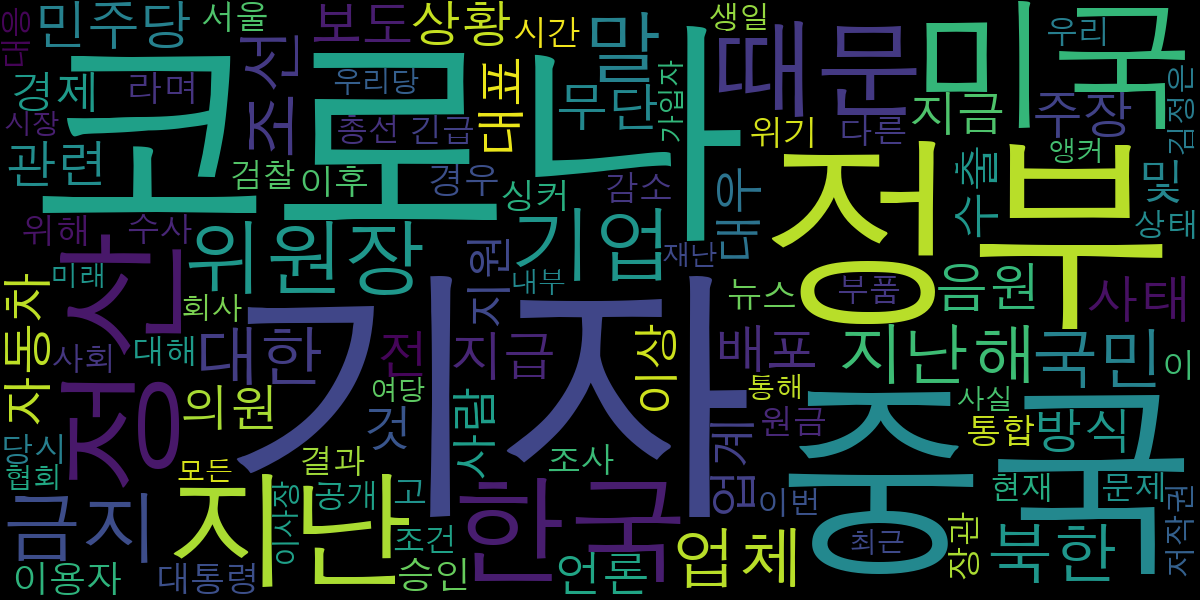

In [15]:
wc = WordCloud(font_path = "AppleGothic",width =1200, height = 600)
wc.generate_from_frequencies(tags)
wc.to_file("news.png")
wc.to_image()